In [1]:
import pandas as pd
import numpy as np

# Business task:
- Design marketing strategies aimed at converting casual riders into annual members 
- How to achieve these goals?
    - Help marketing team understand: 
        - How do annual members and casual riders differ?
        - Why would casual riders buy a membership?
        - How would digital media affect marketing tactics?
- Analyze historic bike trip data to identify trends

# Data Sources Used
- Data was sourced from:
     - https://divvy-tripdata.s3.amazonaws.com/index.html
    - 2020- 2021 bike share data (April 2020- March 2021)
 
- The data consisted of 12 CSV files that had information on 
    - Ride ID
    - Rideable type
    - Starting station (name/ID)
    - Ending station (name/ID)
    - Rider type
- Columns added to the data include
    - Ride time 
    - hh:mm:ss 
    - minutes 
    - Day name
    - Week name


# Summary Analysis 

1. On a high level, the data shows that early summer (May - July) and the weekends (Saturday/Sunday) see the most total bike traffic. Bike traffic was measured by total average ride duration and total number of riders per month/day. July saw the most average rider time (29.4 minutes) and August had the most average total riders (598,463 riders). Saturday had the most average rider time per day (27.8 min) and the most riders per day (51,484 riders).


2. For the results of the casual versus member rider data, there were several unexpected results. Across both monthly and daily rider data, casual members have more ride duration on average than members. Casual riders had an average monthly ride duration of 31.9 min and an average daily duration of 34.4 min. Members had an average monthly ride duration of 15.2 minutes and an average daily duration of 15.5 minutes. 

3. While casual riders put in more time per ride, there were more total members that road on a monthly basis with an average of 159,626 riders versus 111,259 casual riders per month. For the daily breakdown, members had more total riders on weekdays (Monday-Friday); however, for the weekends, the trends were different. Casual members had more total riders on Saturdays on average and were nearly equal to member riders on Sundays.
	
4. Lastly, member riders comprised of 59% of the total users and casual riders made up 41.%


## Key Findings 
1. There are less casual riders (41%) than members (59%)
2. May-July have the most ride time across both groups
3. July-August have the most total riders across both groups
4. Casual riders (35.2 min/ride) put in over 200% the average rider time as members (15.5 min/ride)
5. The weekends have the most rider duration across both groups.
6. Saturdays have the most total riders across both groups. 
7. Members are more consistent with rider time throughout the week with a slight increases on weekends
8. Casual riders spike significantly higher ride time on the weekends 
9. Casual riders have more total rides/ride time on Saturdays than members 
10. The top 5 stations were:
    - Streeter Dr & Grand Ave	
    - Theater on the Lake	
    - Lake Shore Dr & Monroe St	
    - Clark St & Elm St	
    - Lake Shore Dr & North Blvd	



## Recommendations 
1. Focus marketing on casual riders with more marketing material targeted during the late spring/early summer period 
    - Conversion of casual users to members will be beneficial for long term growth
    - Dive into reasons why becoming a member will not only be convienent, but a way to improve quality of life
2. Create promotions that get casual riders to try the membership 
    - Promotions will help show that a membership is more economical for casual users
    - Offer member perks that casual riders cannot get
    - We believe in our product/service and believe that a demo of the membership benefits will help convert casual users
3. Use digital marketing, social media, and a dedicated bikeshare app to reach more current casual riders and new riders 
    - In the internet age, reach/engagement/marketing is mostly powered via digital means 
    - Make Cyclistic a known name around our service area and have it associated with appealing images
4. For the top stations:
    - Consider increasing the bike capacity of those stations
    - Dive into the "why" that drives the popularity of those stations

# Analysis:

# Objective 1:
1. Import Data
    - Read in the first 9 CSV files that corresponds to March 2020 to December 2020
    - Read in the last 3 CSV files that corresponds to January 2021 to March 2021
2. Drop columns that are not needed
3. Set the appropriate data types

### 1. Import CSV files

In [2]:
d={}
for i in range(4,13):
    path=f'2020_{i}.csv'
    d[i]=pd.read_csv(path)

In [3]:
g = {}
for i in range(1,4):
    path=f'2021_{i}.csv'
    g[i]=pd.read_csv(path)

In [4]:
# concatenate all of the imported CSV files
df = pd.concat([g[1], g[2], g[3], d[4], d[5], d[6], d[7], d[8], d[9], d[10], d[11], d[12]])

### 2. Drop columns

- Drop geographic collumns
- Drop collumns I added back in September when i first did this whole project on Excel/SQL
    - Columns: ride_length, day, month
    - Will add these again in Python
- Drop station names in favor of station ID

In [85]:
df = df.drop(columns=['start_lat', 'start_lng', 'end_lng', 'end_lat', 'ride_length', 'day', 'month','start_station_name', 'end_station_name'])

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489697 entries, 0 to 131572
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  day                 object 
 15  month               object 
dtypes: float64(4), object(12)
memory usage: 2.4 GB


### 3. Set the correct data types 

In [7]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,3.404972e+06,3.404972e+06,3.400333e+06,3.400333e+06
mean,4.190407e+01,-8.764483e+01,4.190434e+01,-8.764511e+01
std,4.364574e-02,2.576471e-02,4.374345e-02,2.589770e-02
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01
25%,4.188224e+01,-8.765887e+01,4.188266e+01,-8.765914e+01
50%,4.190000e+01,-8.764157e+01,4.190068e+01,-8.764182e+01
75%,4.193000e+01,-8.762773e+01,4.193060e+01,-8.762773e+01
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01


In [8]:
df = df.astype({'ride_id':'string', 'rideable_type':'category', 'started_at':'Datetime64', 'ended_at':'Datetime64',
                'start_station_id':'string', 'end_station_id':'string', 'member_casual':'category'})

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489697 entries, 0 to 131572
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    string        
 6   end_station_name    object        
 7   end_station_id      string        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  ride_length         object        
 14  day                 object        
 15  month               object        
dtypes: category(2), datetime64[ns](2), float64(4), object(5), string(3)
memory usage: 1.7 GB


# Objective 2:
1. Drop Duplicate rows
2. Remove rows with missing data

In [10]:
df.duplicated().sum()

0

In [11]:
(df.isna().sum() / df.count()) * 100

ride_id                  0.000000
rideable_type            0.000000
started_at               0.000000
ended_at                 0.000000
start_station_name       3.628039
start_station_id         3.647306
end_station_name         4.280410
end_station_id           4.294778
start_lat                2.488273
start_lng                2.488273
end_lat                  2.628096
end_lng                  2.628096
member_casual            0.000000
ride_length           4018.851579
day                   4018.851579
month                 4018.851579
dtype: float64

The missing data occurs on station IDs only. Furthermore, the missing data only makes up ~ 4% of the total data in those columns. Since it is not clear if this data is MCAR (Missing Completely at Random),
MAR (Missing at Random), or NMAR (Not Missing at Random), I will keep the missing data for the time being. There is a lot of data available for the rows.

# Objectve 3:

1. Add ride_length column
2. Add day column
3. Add month column

In [12]:
df.started_at.dt.month_name()

0          January
1          January
2          January
3          January
4          January
            ...   
131568    December
131569    December
131570    December
131571    December
131572    December
Name: started_at, Length: 3489697, dtype: object

In [13]:
df = df.assign(
    ride_length =round((df.ended_at - df.started_at).dt.total_seconds() / 60, 1),
    day=df.started_at.dt.day_name().astype('category'),
    month=df.started_at.dt.month_name().astype('category')
    )

In [14]:
# set an order to categorical data 

df['month'] = df['month'].cat.set_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
df['day'] = df['day'].cat.set_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)

# Objective 4:
1. Inspect data
    - check unique values
    - check validity of ranges
2. Filter out any potentially erroneous data

Look at the unique values of categorical data that is less than 5:

In [15]:
for i,value in enumerate(df.nunique().values):
    if value < 5:
        print(df.nunique().index[i])

rideable_type
member_casual


In [16]:
df.rideable_type.unique()

['electric_bike', 'classic_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike']

In [17]:
df['member_casual'].unique()

['member', 'casual']
Categories (2, object): ['casual', 'member']

In [18]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'day', 'month'],
      dtype='object')

Look at the ranges of key columns:
- __Ride length:__ Do the ride times make sense?

In [19]:
df.ride_length.describe()

count    3.489697e+06
mean     2.476787e+01
std      3.904245e+02
min     -2.905000e+04
25%      7.900000e+00
50%      1.450000e+01
75%      2.660000e+01
max      5.872000e+04
Name: ride_length, dtype: float64

In [20]:
# how long is the longest ride in hours?
df['ride_length'].max() / 60

978.6666666666666

In [21]:
# how long is the longest ride in hours?
df['ride_length'].min() / 60

-484.1666666666667

The data shows that the maximum ride time is over 978 hours and the minimum ride time is -484 hours. This is obviously incorrect data.

In [22]:
# remove rows that have a ride_length that's greater than 12 hours 
df = df.loc[df['ride_length'] < 60*12]

In [23]:
30/(60)

0.5

In [24]:
# remove rows that have a ride length that's greater than 30 seconds
df = df.loc[df['ride_length'] > .5]

## Export Cleaned Data

In [55]:
# df.to_csv('raw_cyclistic.csv', index=False)

# Objective 4
1. Analysis 
    -  How do annual members and casual riders differ?
    - Why would casual riders buy a membership?
    - How would digital media affect marketing tactics?

In [56]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'day', 'month'],
      dtype='object')

In [57]:
# member vs casual 
(df
 .groupby('member_casual')
 .agg(
     mean_ride_time=('ride_length','mean'), 
     rideable_mode=('rideable_type', pd.Series.mode), 
     day_mode=('day', pd.Series.mode),
     month_mode=('month', pd.Series.mode), 
     rider_count=('member_casual','count')
     )
)

,mean_ride_time,rideable_mode,day_mode,month_mode,rider_count
member_casual,,,,,
casual,34.576481,docked_bike,Saturday,August,1409428
member,15.536882,docked_bike,Saturday,August,2027127


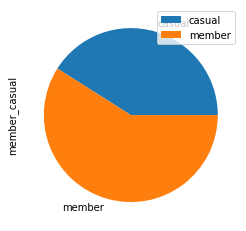

In [58]:
(df
 .groupby('member_casual')
 .agg({'member_casual':'count'})
).plot(kind='pie', subplots=True);

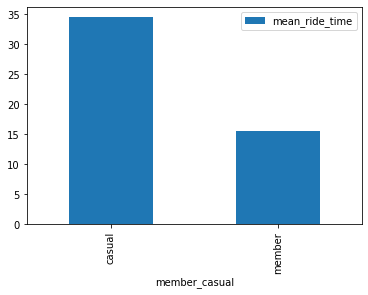

In [59]:
(df
 .groupby('member_casual')
 .agg(mean_ride_time=('ride_length','mean'))
).plot(kind='bar');

# Monthly Breakdowns

In [60]:
(df
 .groupby('month')
 .agg(mean_ride_time=('ride_length','mean'),
      ride_count=('ride_id','count'))
)

,mean_ride_time,ride_count
month,,
January,13.810939,95761
February,17.370395,48793
March,19.657754,226121
April,22.799702,83900
May,28.833262,198013
June,27.798391,338850
July,29.326366,543597
August,25.508029,610938
September,22.043267,523823


In [61]:
(df
 .pivot_table(
     index=df.month,
    columns=df.member_casual, 
    aggfunc={'ride_length':'mean'})
)

ride_length           
member_casual      casual     member
month                               
January         19.923615  12.408163
February        26.953490  14.918074
March           29.719860  13.806549
April           36.294319  17.592970
May             41.371726  19.204057
June            39.512740  18.161625
July            41.885326  17.296148
August          36.115418  16.268252
September       31.137239  15.083697
October         26.192658  13.676668
November        26.921611  13.469339
December        21.711420  12.471899

<AxesSubplot:xlabel='month'>

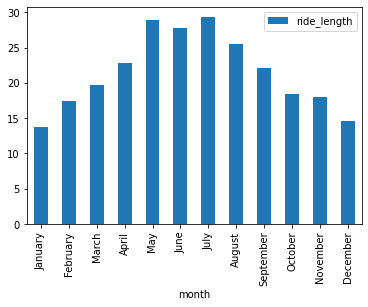

In [62]:
(df
 .groupby('month')
 .agg({'ride_length':'mean'})
).plot(kind='bar')

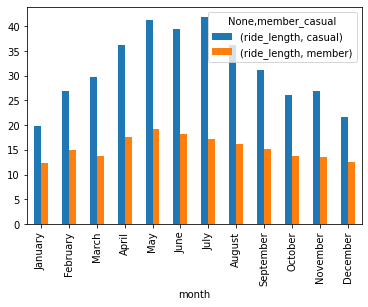

In [63]:
(df
 .pivot_table(
     index=df.month,
    columns=df.member_casual, 
    aggfunc={'ride_length':'mean'})
).plot(kind='bar');

<AxesSubplot:xlabel='month'>

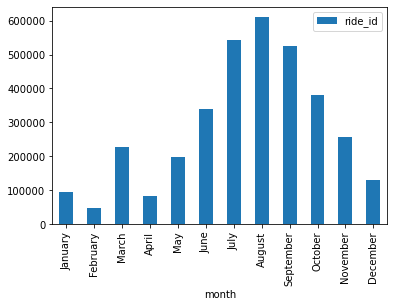

In [64]:
(df
 .groupby('month')
 .agg({'ride_id':'count'})
).plot(kind='bar')

<AxesSubplot:xlabel='month'>

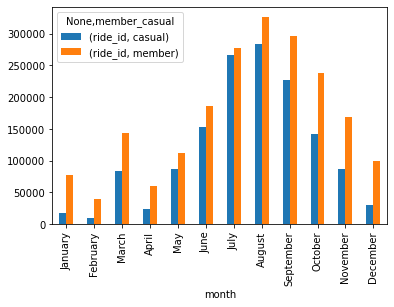

In [65]:
(df
 .pivot_table(
     index='month',
     columns=df.member_casual, 
     aggfunc={'ride_id':'count'})
).plot(kind='bar')

# Daily Breakdowns

In [66]:
(df
 .groupby('day')
 .agg({'ride_length':'mean'})
)

,ride_length
day,
Monday,21.701135
Tuesday,20.387137
Wednesday,20.181788
Thursday,20.614383
Friday,22.315567
Saturday,27.478834
Sunday,28.095070


In [67]:
(df
 .pivot_table(
     index=df.day,
    columns=df.member_casual, 
    aggfunc={'ride_length':'mean'})
)

ride_length           
member_casual      casual     member
day                                 
Monday          33.996496  14.766577
Tuesday         31.641525  14.649854
Wednesday       30.748283  14.706371
Thursday        31.196986  14.768426
Friday          32.702458  15.256498
Saturday        37.370230  17.191049
Sunday          38.885451  17.402906

<AxesSubplot:xlabel='day'>

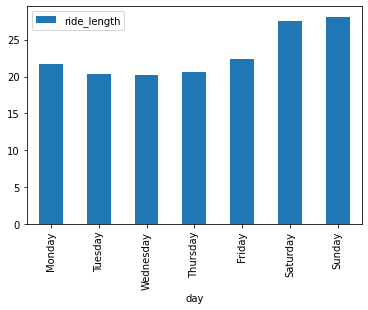

In [68]:
(df
 .groupby('day')
 .agg({'ride_length':'mean'})
).plot(kind='bar')

<AxesSubplot:xlabel='day'>

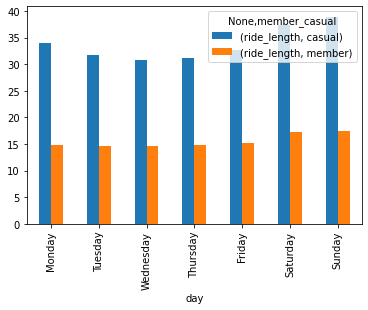

In [69]:
(df
 .pivot_table(
     index=df.day,
    columns=df.member_casual, 
    aggfunc={'ride_length':'mean'})
).plot(kind='bar')

In [70]:
daily_counts = (df
                 .groupby([df.started_at.dt.isocalendar().week, df.day])
                 .agg({'ride_id':'count'})
                ).droplevel(0)

In [71]:
daily_counts.groupby('day').agg({'ride_id':'mean'})

,ride_id
day,
Monday,7795.584906
Tuesday,8002.641509
Wednesday,8636.792453
Thursday,8700.566038
Friday,9592.113208
Saturday,12274.509434
Sunday,9838.452830


<AxesSubplot:xlabel='day'>

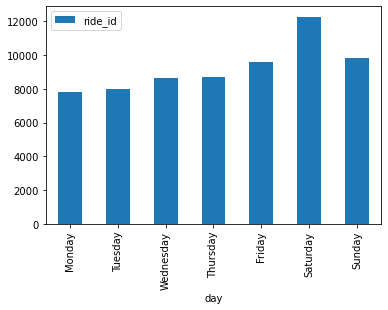

In [72]:
daily_counts.groupby('day').agg({'ride_id':'mean'}).plot(kind='bar')

In [73]:
daily_members = (df
                 .groupby([df.started_at.dt.isocalendar().week, df.day, df.member_casual])
                 .agg({'ride_id':'count'})
                ).droplevel(0)                

In [74]:
daily_members.pivot_table(
    index='day',
    columns='member_casual',
    values='ride_id'
)

member_casual,casual,member
day,,
Monday,2811.188679,4984.396226
Tuesday,2702.113208,5300.528302
Wednesday,2947.905660,5688.886792
Thursday,3096.018868,5604.547170
Friday,3881.207547,5710.905660
Saturday,6257.811321,6016.698113
Sunday,4896.735849,4941.716981


<AxesSubplot:xlabel='day'>

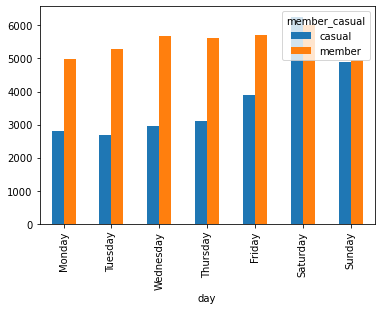

In [75]:
daily_members.pivot_table(
    index='day',
    columns='member_casual',
    values='ride_id'
).plot(kind='bar')

# Most common stations:

In [76]:
top_stations = df.groupby('start_station_id').agg(count=('start_station_id','count')).sort_values('count', ascending=False).head(10)
top_stations.head()

,count
start_station_id,
35.0,27199
177.0,24660
76.0,23068
176.0,21196
268.0,20107


### Create a station key to join with "Most common station ID" table

In [96]:
station_key = pd.read_csv('raw_cyclistic.csv', usecols=['start_station_id', 'start_station_name'], dtype={'start_station_name':'category', 'start_station_id':'category'})

station_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436555 entries, 0 to 3436554
Data columns (total 2 columns):
 #   Column              Dtype   
---  ------              -----   
 0   start_station_name  category
 1   start_station_id    category
dtypes: category(2)
memory usage: 13.2 MB


In [97]:
station_key.columns = ['station', 'id']

In [98]:
station_key.duplicated().sum()

3434654

In [99]:
station_key = station_key.drop_duplicates()

In [100]:
station_key.shape

(1901, 2)

In [101]:
station_key.head()

,station,id
0,California Ave & Cortez St,17660
25,Halsted St & North Branch St,KA1504000117
27,Glenwood Ave & Touhy Ave,525
32,Michigan Ave & 8th St,623
39,Shedd Aquarium,15544


## Top Stations:

In [103]:
# join station id's with station names from the station_key table to get the actual station names

top_stations.merge(
    station_key,
    how='left',
    left_on='start_station_id',
    right_on='id'
).loc[:,['station','id','count']]

,station,id,count
0,Streeter Dr & Grand Ave,35.0,27199
1,Theater on the Lake,177.0,24660
2,Lake Shore Dr & Monroe St,76.0,23068
3,Clark St & Elm St,176.0,21196
4,Lake Shore Dr & North Blvd,268.0,20107
5,Millennium Park,90.0,17699
6,Wells St & Concord Ln,289.0,17089
7,Michigan Ave & Oak St,85.0,16781
8,Indiana Ave & Roosevelt Rd,255.0,16444
9,Clark St & Armitage Ave,94.0,16424
